# Linear regression

In [85]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Building a toy dataset

In [86]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [87]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)

In [88]:
x_train.shape

(11,)

In [89]:
# Important: 2D is Required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

y = 2x + 1

In [90]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [91]:
y_train = np.array(y_values, dtype=np.float32)
y_train

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)

In [92]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## Building Model

1. Linear model
 - True equation: y = 2x + 1
2. Forward
 - Example:
        - Input x = 1
        - Output $\hat{y}$ = 2

In [93]:
# Create a class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

Instantiate model class
    - Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10];
    - Desired Output: [ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]

In [94]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [95]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train the network

In [96]:
epochs = 100

for epoch in range(epochs):
    epochs += 1
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters
    optimizer.zero_grad()
    
    # Forward to get outputs
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t parameters
    loss.backward()
    
    # Upadting parameters
    optimizer.step()
    
    print("Epoch: {}, loss: {}".format(epoch, loss.item()))

Epoch: 0, loss: 151.26153564453125
Epoch: 1, loss: 12.543886184692383
Epoch: 2, loss: 1.2268285751342773
Epoch: 3, loss: 0.30145785212516785
Epoch: 4, loss: 0.2237296998500824
Epoch: 5, loss: 0.21516607701778412
Epoch: 6, loss: 0.2122683823108673
Epoch: 7, loss: 0.20985785126686096
Epoch: 8, loss: 0.2075110524892807
Epoch: 9, loss: 0.205193430185318
Epoch: 10, loss: 0.20290207862854004
Epoch: 11, loss: 0.20063625276088715
Epoch: 12, loss: 0.19839586317539215
Epoch: 13, loss: 0.19618040323257446
Epoch: 14, loss: 0.19398970901966095
Epoch: 15, loss: 0.19182337820529938
Epoch: 16, loss: 0.1896812468767166
Epoch: 17, loss: 0.1875631958246231
Epoch: 18, loss: 0.18546876311302185
Epoch: 19, loss: 0.18339751660823822
Epoch: 20, loss: 0.18134963512420654
Epoch: 21, loss: 0.17932458221912384
Epoch: 22, loss: 0.1773221343755722
Epoch: 23, loss: 0.1753418892621994
Epoch: 24, loss: 0.1733839511871338
Epoch: 25, loss: 0.17144781351089478
Epoch: 26, loss: 0.16953322291374207
Epoch: 27, loss: 0.16764

## Compare data

In [97]:
# Predicted
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.49163243],
       [ 2.564842  ],
       [ 4.6380515 ],
       [ 6.711261  ],
       [ 8.784471  ],
       [10.85768   ],
       [12.930889  ],
       [15.004099  ],
       [17.077309  ],
       [19.150518  ],
       [21.223728  ]], dtype=float32)

In [98]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

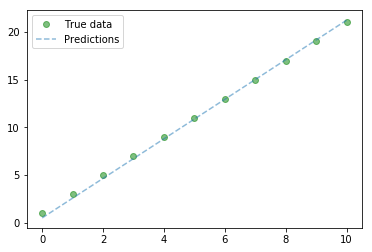

In [102]:
# Clear figure
plt.clf()

# Get Predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label="True data", alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label="Predictions", alpha=0.5)

# Legend and plots
plt.legend(loc="best")
plt.show()

## Save model

In [103]:
save_model = False

if save_model is True:
    # Saves
    # Alpha & Beta
    torch.save(model.state_dict(), 'awesome_model.pk1')

In [105]:
## Load model
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pk1'))

# Building a Linear Regression model with PyTorch (GPU)

CPU Summary = The proccess from above

** GPU: 2 Things must be on the GPU **
- Model
- Variables

In [108]:
##
## Same
##

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

    input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

##
## GPU
##
if torch.cuda.is_available():
    model.cuda()
    
##
## Same
##
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100

for epoch in range(epochs):
    epochs += 1
    
    ##
    ## GPU
    ##
    
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    ##
    ## Same
    ##
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    print("Epoch: {}, loss: {}".format(epoch, loss.item()))

Epoch: 0, loss: 67.61626434326172
Epoch: 1, loss: 5.5734148025512695
Epoch: 2, loss: 0.5121253132820129
Epoch: 3, loss: 0.09865007549524307
Epoch: 4, loss: 0.06428910791873932
Epoch: 5, loss: 0.06085832789540291
Epoch: 6, loss: 0.059957485646009445
Epoch: 7, loss: 0.059269871562719345
Epoch: 8, loss: 0.05860653892159462
Epoch: 9, loss: 0.05795199051499367
Epoch: 10, loss: 0.05730482190847397
Epoch: 11, loss: 0.05666492506861687
Epoch: 12, loss: 0.05603215470910072
Epoch: 13, loss: 0.05540647357702255
Epoch: 14, loss: 0.054787732660770416
Epoch: 15, loss: 0.054175931960344315
Epoch: 16, loss: 0.05357092618942261
Epoch: 17, loss: 0.052972689270973206
Epoch: 18, loss: 0.05238116905093193
Epoch: 19, loss: 0.05179627239704132
Epoch: 20, loss: 0.05121784657239914
Epoch: 21, loss: 0.05064592510461807
Epoch: 22, loss: 0.05008035525679588
Epoch: 23, loss: 0.04952109232544899
Epoch: 24, loss: 0.04896808788180351
Epoch: 25, loss: 0.04842129722237587
Epoch: 26, loss: 0.04788055270910263
Epoch: 27,